In [8]:
import os
import pandas as pd

from bokeh.io import  show, output_file
from bokeh.layouts import gridplot, layout, widgetbox, column
from bokeh.models import (GMapPlot, GMapOptions, ColumnDataSource, Circle, 
                          DataRange1d, PanTool, WheelZoomTool, BoxSelectTool, HoverTool, 
                         CustomJS, Text, CrosshairTool, DatetimeTickFormatter, Range1d, 
                         Panel, Tabs, Line, Ray)
from bokeh.plotting import figure

In [9]:
files = [f for f in os.listdir('.') if os.path.isfile(f) & f.endswith('.csv')]
for f in files:
    print(f)


Data Log Feb 20 2020 10_48 AM.csv


In [10]:
import_cols = [
    'Frame Time (h:m:s.ms)',
    'AUX.ACCEL.FORWARD Gs', 
    'AUX.GPS.LATITUDE °', 
    'AUX.GPS.LONGITUDE °', 
    'SAE.MAP inHg', 
    'SAE.RPM rpm', 
    'SAE.VSS km/h', 
    'CALC.FC.FUEL_VOLUME gal (US) | gal (UK)', 
    'CALC.FC.IFC l/100km',
    'CALC.ENGINE_POWER hp',
    'CALC.GEAR Cur, Sug, Ind, Num',
    'SAE.ECT °C'
]

col_names = [
    'Time',
    'Acceleration', 
    'Lat', 
    'Lon', 
    'Man_pressure', 
    'RPM', 
    'Speed', 
    'Fuel_Flow', 
    'Fuel_Total', 
    'Power',
    'Gear',
    'Temp'
]

rename_col = dict(zip(import_cols,col_names))

In [96]:
trip_df = pd.read_csv( 'Data Log Feb 20 2020 10_48 AM.csv', usecols=import_cols, low_memory=False)
# usecols=import_cols,
trip_df = trip_df.drop(0)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
trip_df.rename(columns=rename_col, inplace=True)
trip_df



#update the data types for numeric and datetime associated  data
numeric_col = ['Acceleration', 'Lat', 'Lon', 'Man_pressure', 'RPM', 'Speed', 'Fuel_Flow', 'Fuel_Total', 'Power','Temp']
trip_df[numeric_col] = trip_df[numeric_col].apply(pd.to_numeric, errors='coerce', axis=1)
trip_df['Time'] = pd.to_datetime(trip_df['Time'], format='%H:%M:%S.%f')





In [97]:
trip_df = trip_df[100:10100]
trip_df = trip_df.set_index('Time')
trip_df

,Acceleration,Lat,Lon,RPM,Man_pressure,Fuel_Flow,Fuel_Total,Gear,Power,Speed,Temp
Time,,,,,,,,,,,
1900-01-01 00:00:10.503,-0.01,47.34522,-1.79779,660.0,28.3,1.4,NaN,"0,0,0,6",2.0,0.0,NaN
1900-01-01 00:00:10.403,-0.01,47.34523,-1.79779,660.0,28.3,1.4,NaN,"0,0,0,6",2.0,0.0,NaN
1900-01-01 00:00:10.526,-0.01,47.34523,-1.79779,660.0,28.3,1.4,NaN,"0,0,0,6",2.0,0.0,NaN
1900-01-01 00:00:10.689,-0.01,47.34523,-1.79779,658.0,28.3,1.4,NaN,"0,0,0,6",2.0,0.0,NaN
1900-01-01 00:00:10.824,-0.01,47.34523,-1.79779,658.0,28.3,1.4,NaN,"0,0,0,6",2.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1900-01-01 00:15:00.140,-0.74,47.34526,-1.79782,658.0,28.3,2.5,NaN,"0,0,0,6",3.0,0.0,103.0
1900-01-01 00:15:00.229,-0.77,47.34526,-1.79782,658.0,28.3,2.5,NaN,"0,0,0,6",3.0,0.0,103.0
1900-01-01 00:15:00.333,-0.76,47.34526,-1.79782,658.0,28.3,2.5,NaN,"0,0,0,6",3.0,0.0,103.0


In [126]:

frame = 2000
frametime = frame * (1000/24)
frametimedate = pd.to_datetime(frametime, unit='ms')

print(frametimedate)

trip_df[trip_df.index > '1900-01-01 00:00:15.000']



1970-01-01 00:01:23.333333333


,Acceleration,Lat,Lon,RPM,Man_pressure,Fuel_Flow,Fuel_Total,Gear,Power,Speed,Temp
Time,,,,,,,,,,,
1900-01-01 00:00:15.116,-0.00,47.34521,-1.79781,660.0,28.3,1.4,NaN,"0,0,0,6",3.0,0.0,NaN
1900-01-01 00:00:15.277,-0.00,47.34521,-1.79781,660.0,28.3,1.4,NaN,"0,0,0,6",3.0,0.0,NaN
1900-01-01 00:00:15.381,-0.00,47.34521,-1.79781,660.0,28.3,1.4,NaN,"0,0,0,6",3.0,0.0,NaN
1900-01-01 00:00:15.487,-0.01,47.34521,-1.79781,660.0,28.3,1.4,NaN,"0,0,0,6",3.0,0.0,NaN
1900-01-01 00:00:15.489,-0.01,47.34520,-1.79781,660.0,28.3,1.4,NaN,"0,0,0,6",3.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1900-01-01 00:15:00.140,-0.74,47.34526,-1.79782,658.0,28.3,2.5,NaN,"0,0,0,6",3.0,0.0,103.0
1900-01-01 00:15:00.229,-0.77,47.34526,-1.79782,658.0,28.3,2.5,NaN,"0,0,0,6",3.0,0.0,103.0
1900-01-01 00:15:00.333,-0.76,47.34526,-1.79782,658.0,28.3,2.5,NaN,"0,0,0,6",3.0,0.0,103.0


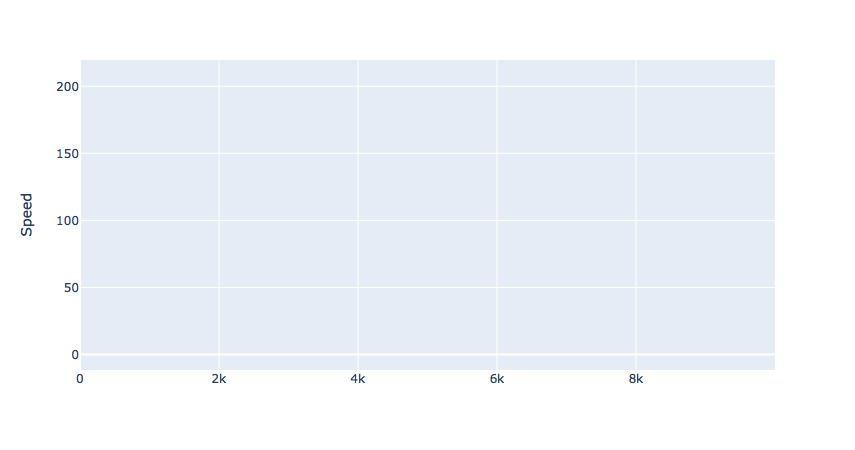

In [99]:
import plotly.express as px

fig = px.line(trip_df,  y='Speed')
fig.show()

In [57]:
!pip install opencv-python

     |████████████████████████████████| 47.9 MB 226 kB/s  eta 0:00:01   |██▌                             | 3.8 MB 1.9 MB/s eta 0:00:24     |█████                           | 7.6 MB 1.9 MB/s eta 0:00:22     |█████████████▊                  | 20.6 MB 26.0 MB/s eta 0:00:02     |███████████████████             | 28.5 MB 26.0 MB/s eta 0:00:01     |████████████████████            | 29.9 MB 26.0 MB/s eta 0:00:01


In [58]:
import cv2
import numpy as np
from cv2 import VideoWriter, VideoWriter_fourcc

In [62]:
width = 1280
height = 720
FPS = 24
seconds = 10

fourcc = VideoWriter_fourcc(*'MP42')
video = VideoWriter('./noise.avi', fourcc, float(FPS), (width, height))

In [64]:
for _ in range(FPS*seconds):
    frame = np.random.randint(0, 256, 
                              (height, width, 3), 
                              dtype=np.uint8)
    video.write(frame)

In [66]:
video.release()

In [76]:
flms = 1000/24

for f in range(FPS*seconds):
    frame_time = flms * f

    print(f,frame_time)

0 0.0
1 41.666666666666664
2 83.33333333333333
3 125.0
4 166.66666666666666
5 208.33333333333331
6 250.0
7 291.66666666666663
8 333.3333333333333
9 375.0
10 416.66666666666663
11 458.3333333333333
12 500.0
13 541.6666666666666
14 583.3333333333333
15 625.0
16 666.6666666666666
17 708.3333333333333
18 750.0
19 791.6666666666666
20 833.3333333333333
21 875.0
22 916.6666666666666
23 958.3333333333333
24 1000.0
25 1041.6666666666665
26 1083.3333333333333
27 1125.0
28 1166.6666666666665
29 1208.3333333333333
30 1250.0
31 1291.6666666666665
32 1333.3333333333333
33 1375.0
34 1416.6666666666665
35 1458.3333333333333
36 1500.0
37 1541.6666666666665
38 1583.3333333333333
39 1625.0
40 1666.6666666666665
41 1708.3333333333333
42 1750.0
43 1791.6666666666665
44 1833.3333333333333
45 1875.0
46 1916.6666666666665
47 1958.3333333333333
48 2000.0
49 2041.6666666666665
50 2083.333333333333
51 2125.0
52 2166.6666666666665
53 2208.333333333333
54 2250.0
55 2291.6666666666665
56 2333.333333333333
57 2375.